In [1]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

def autolabel(rects, xpos='center'):
   ha = {'center': 'center', 'right': 'left', 'left': 'right'}
   offset = {'center': 0, 'right': 1, 'left': -1}
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),
         xytext=(offset[xpos]*3, 3), # use 3 points offset
         textcoords="offset points", # in both directions
         ha=ha[xpos], va='bottom')

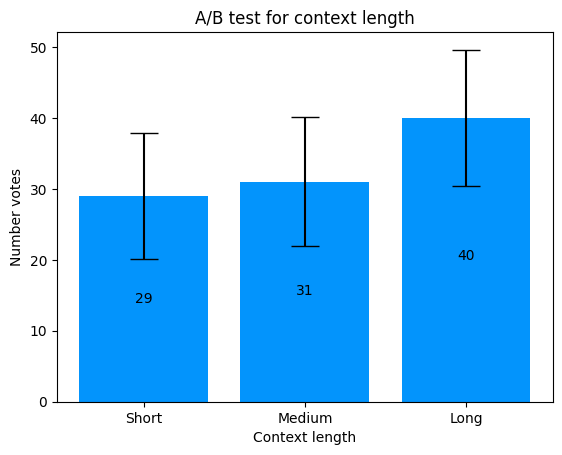

In [75]:
# Context length
length = ['Short', 'Medium', 'Long']
len_data = [29, 31, 40]

plt.bar(length, len_data, color='#0394fc')
plt.errorbar(length, len_data, yerr=[1.96 * np.sqrt(x * (1-x) / 100) * 100 for x in np.array(len_data)/100], fmt=" ", color="black", capsize=10)
addlabels(length, len_data)
plt.title('A/B test for context length')
plt.ylabel('Number votes')
plt.xlabel('Context length')
plt.savefig('context_length.png')
plt.show()

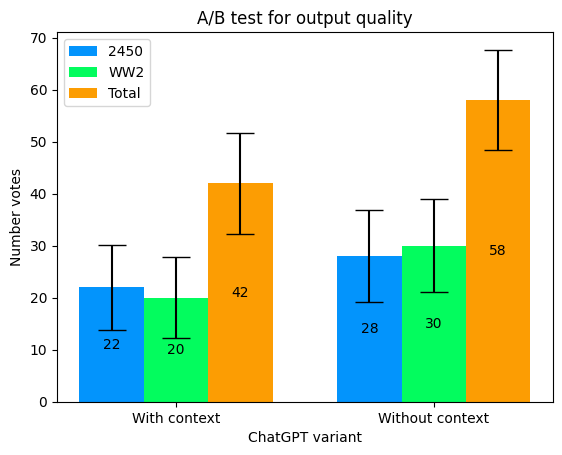

In [19]:
# Output A/B-test
model = ['With context', 'Without context']
names = ['2450', 'WW2', 'Total']
c_2450 = [22, 28]
c_ww2 = [20, 30]
c_tot = [x + y for x, y in zip(c_2450, c_ww2)]
colors = ['#0394fc', '#03fc5e', '#fc9d03']

N = len(model)
x = np.arange(N)
width = 0.25
multiplier = 0

fig, ax = plt.subplots()

for name, data in zip(names, [c_2450, c_ww2, c_tot]):
    offset = width * multiplier
    bar = ax.bar(x + offset, data, width, label=name, color=colors[multiplier])
    plt.errorbar(x + offset, data, yerr=[1.96 * np.sqrt(x * (1-x) / 100) * 100 for x in np.array(data)/100], fmt=" ", ecolor='black', capsize=10)
    ax.bar_label(bar, label_type='center')
    multiplier += 1

plt.title('A/B test for output quality')
plt.ylabel('Number votes')
plt.xlabel('ChatGPT variant')
plt.xticks(x + width, model)
plt.legend(loc='best')
plt.savefig('ab-test.png')
plt.show()

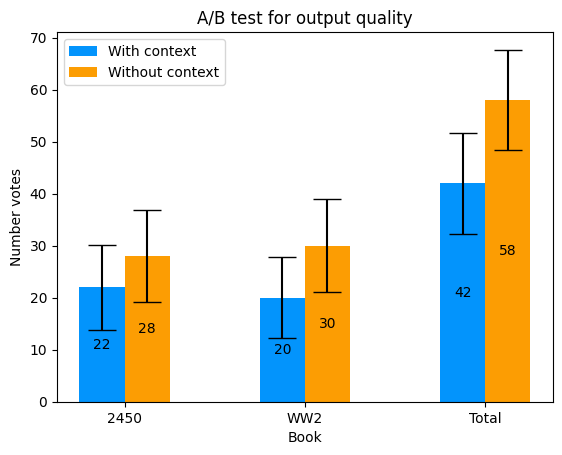

In [20]:
# Output A/B-test
models = ['With context', 'Without context']
names = ['2450', 'WW2', 'Total']
w_ctx = [22, 20, 22+20]
wo_ctx = [28, 30, 28+30]
colors = ['#0394fc', '#fc9d03']

N = len(names)
x = np.arange(N)
width = 0.25
multiplier = 0

fig, ax = plt.subplots()

for model, data in zip(models, [w_ctx, wo_ctx]):
    offset = width * multiplier
    bar = ax.bar(x + offset, data, width, label=model, color=colors[multiplier])
    plt.errorbar(x + offset, data, yerr=[1.96 * np.sqrt(x * (1-x) / 100) * 100 for x in np.array(data)/100], fmt=" ", ecolor='black', capsize=10)
    ax.bar_label(bar, label_type='center')
    multiplier += 1

plt.title('A/B test for output quality')
plt.ylabel('Number votes')
plt.xlabel('Book')
plt.xticks(x + width/2, names)
plt.legend(loc='best')
plt.savefig('ab-test.png')
plt.show()